In [1]:
import pandas as pd
import json
from tqdm import tqdm
import chord_search
import common_chords

# import list of paths of songs
paths = pd.read_csv("PDMX data/subset_paths/all.txt")
len(paths)

254077

In [ ]:
# # load in 10,000 songs to see time
# for i in tqdm(range(0, 100000)):
#     path = paths["path"][i]
#     path = "PDMX data" + path.lstrip(".")
#     with open(path, 'r') as file:
#         data = json.load(file)

I Shall Be No Stranger There


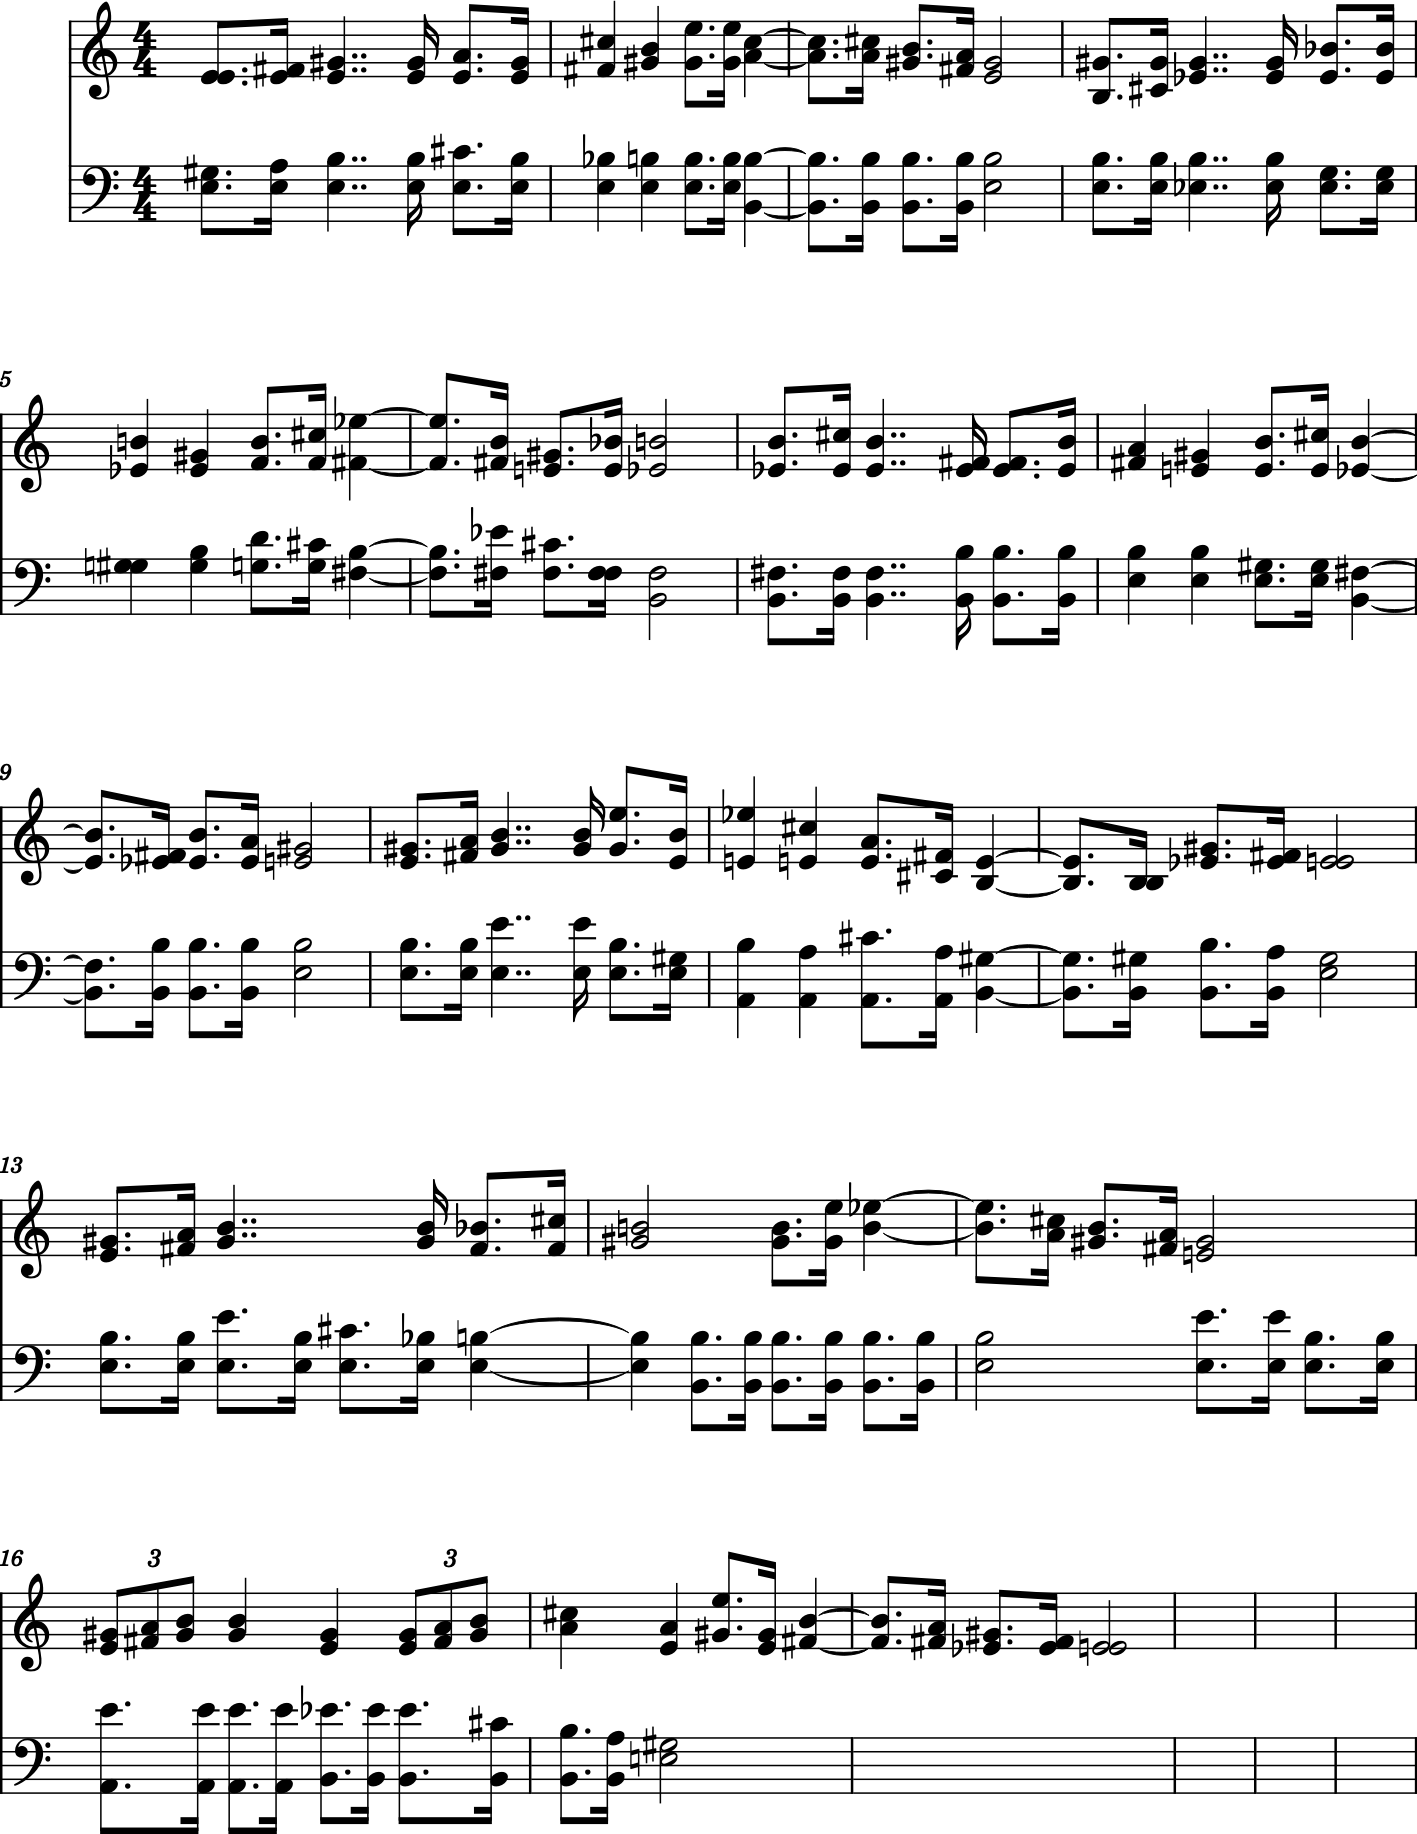

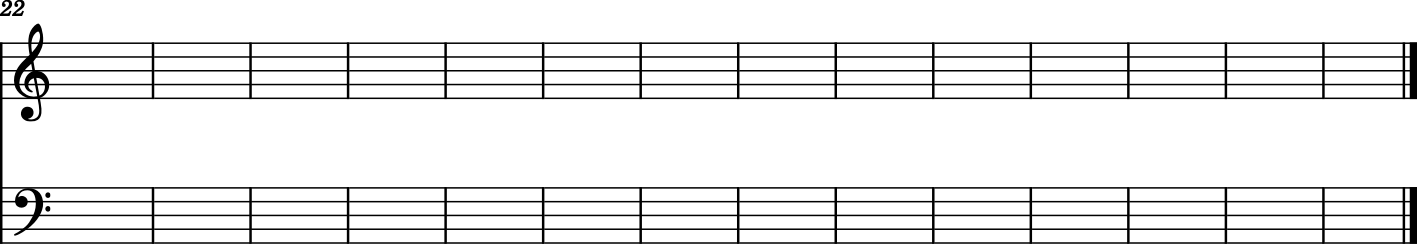

In [3]:
# view a given sample song and print out the score
path = paths["path"][0]
path = "PDMX data" + path.lstrip(".")

with open(path, 'r') as file:
    data = json.load(file)

print(data["metadata"]["title"])
song_tracks = chord_search.combine_tracks(data["tracks"])
len(song_tracks["chords"])
events = chord_search.create_events(song_tracks["notes"])
chord_search.display_track(data)

I Shall Be No Stranger There
[{'__class__.__name__': 'Note', 'time': 0, 'pitch': 64, 'duration': 360, 'velocity': 64, 'pitch_str': 'E', 'measure': 1, 'is_grace': False}, {'__class__.__name__': 'Note', 'time': 0, 'pitch': 64, 'duration': 360, 'velocity': 64, 'pitch_str': 'E', 'measure': 1, 'is_grace': False}, {'__class__.__name__': 'Note', 'time': 360, 'pitch': 64, 'duration': 120, 'velocity': 64, 'pitch_str': 'E', 'measure': 1, 'is_grace': False}, {'__class__.__name__': 'Note', 'time': 360, 'pitch': 66, 'duration': 120, 'velocity': 64, 'pitch_str': 'F#', 'measure': 1, 'is_grace': False}]


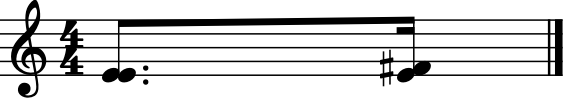

In [4]:
# get a random set of chords from a song and visualise them

path = paths["path"][0]
path = "PDMX data" + path.lstrip(".")

with open(path, 'r') as file:
    data = json.load(file)

print(data["metadata"]["title"])

# get notes for the two clefs
treble = data["tracks"][0]["notes"]
bass = data["tracks"][1]["notes"]

start = 0
window = 4

pattern = treble[start:start+window]
print(pattern)
chord_print = {'tracks': [{'notes': pattern}]}

chord_search.display_track(chord_print, "treble")

In [5]:
# print out a series of notes that occur in a given time window in a song
def print_dicts_with_time(dict_list, search_time, window):
    matching_dicts = [d for d in dict_list if (d.get('time') >= search_time and d.get('time') < (search_time + window))]
    for d in matching_dicts:
        # print(d["time"])
        print(d)
n = 0
print_dicts_with_time(song_tracks["notes"], 120*n, 100)

{'__class__.__name__': 'Note', 'time': 0, 'pitch': 64, 'duration': 360, 'velocity': 64, 'pitch_str': 'E', 'measure': 1, 'is_grace': False}
{'__class__.__name__': 'Note', 'time': 0, 'pitch': 64, 'duration': 360, 'velocity': 64, 'pitch_str': 'E', 'measure': 1, 'is_grace': False}
{'__class__.__name__': 'Note', 'time': 0, 'pitch': 52, 'duration': 360, 'velocity': 64, 'pitch_str': 'E', 'measure': 1, 'is_grace': False}
{'__class__.__name__': 'Note', 'time': 0, 'pitch': 56, 'duration': 360, 'velocity': 64, 'pitch_str': 'G#', 'measure': 1, 'is_grace': False}


In [6]:
# search for the pattern in the songs database
pattern_events = chord_search.create_events(pattern)
chord_search.search_songs(paths[0:1000], pattern_events)

100%|██████████| 1000/1000 [00:01<00:00, 719.22it/s]


[{'PDMX data/data/b/b/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHGmR3JFtLAPyC.json': 'I Shall Be No Stranger There'}]

In [19]:
# get the most common chords in a dataset

events = chord_search.create_events(data["tracks"][0]["notes"])
# Simplify the data structure
simplified = {}
for entry in events:
    time = entry['time']
    pitches = [note['pitch'] for note in entry['notes']]
    simplified[time] = pitches

simplified_tuples = tuple(tuple(pitches) for pitches in simplified.values())
simplified_notes = [common_chords.midi_to_letter_notes(list(notes)) for notes in simplified_tuples]

# Output the simplified dictionary
min_pattern_length = 3
max_pattern_length = 20
min_frequency = 5

# Find and sort patterns
patterns = common_chords.find_patterns_with_complexity(
    simplified, min_len=min_pattern_length, max_len=max_pattern_length, min_frequency=min_frequency
)
# Output the result
print("Patterns sorted by frequency, complexity, and length (above frequency threshold):")
for pattern, frequency in patterns:
    complexity = sum(len(chord) for chord in pattern)
    pattern_notes = [common_chords.midi_to_letter_notes(list(notes)) for notes in pattern]
    print(f"Pattern: {pattern_notes}, Frequency: {frequency}, Complexity: {complexity}")

simplified_notes

Patterns sorted by frequency, complexity, and length (above frequency threshold):
Pattern: [['E4'], ['G#4'], ['E4', 'G#4']], Frequency: 14, Complexity: 4
Pattern: [['G#4'], ['B4'], ['G#4', 'B4']], Frequency: 12, Complexity: 4
Pattern: [['F#4'], ['A4'], ['F#4', 'A4']], Frequency: 8, Complexity: 4
Pattern: [['E4'], ['G#4'], ['E4', 'G#4'], ['E4']], Frequency: 7, Complexity: 5
Pattern: [['G#4'], ['B4'], ['G#4', 'B4'], ['G#4']], Frequency: 7, Complexity: 5
Pattern: [['G#4'], ['E4', 'G#4'], ['E4']], Frequency: 7, Complexity: 4
Pattern: [['B4'], ['G#4', 'B4'], ['G#4']], Frequency: 7, Complexity: 4
Pattern: [['D#4'], ['B4'], ['D#4', 'B4']], Frequency: 7, Complexity: 4
Pattern: [['E4'], ['G#4'], ['E4', 'G#4'], ['F#4']], Frequency: 6, Complexity: 5
Pattern: [['D#4'], ['B4'], ['D#4', 'B4'], ['D#4']], Frequency: 6, Complexity: 5
Pattern: [['G#4'], ['E4', 'G#4'], ['F#4']], Frequency: 6, Complexity: 4
Pattern: [['B4'], ['D#4', 'B4'], ['D#4']], Frequency: 6, Complexity: 4
Pattern: [['G#4'], ['E5'], [

[['E4', 'E4'],
 ['E4', 'F#4'],
 ['E4', 'G#4'],
 ['E4', 'G#4'],
 ['E4', 'A4'],
 ['E4', 'G#4'],
 ['F#4', 'C#5'],
 ['G#4', 'B4'],
 ['G#4', 'E5'],
 ['G#4', 'E5'],
 ['A4', 'C#5'],
 ['A4', 'C#5'],
 ['G#4', 'B4'],
 ['F#4', 'A4'],
 ['E4', 'G#4'],
 ['B3', 'G#4'],
 ['C#4', 'G#4'],
 ['D#4', 'G#4'],
 ['D#4', 'G#4'],
 ['D#4', 'A#4'],
 ['D#4', 'A#4'],
 ['D#4', 'B4'],
 ['D#4', 'G#4'],
 ['F4', 'B4'],
 ['F4', 'C#5'],
 ['F#4', 'D#5'],
 ['F#4', 'B4'],
 ['E4', 'G#4'],
 ['E4', 'A#4'],
 ['D#4', 'B4'],
 ['D#4', 'B4'],
 ['D#4', 'C#5'],
 ['D#4', 'B4'],
 ['D#4', 'F#4'],
 ['D#4', 'F#4'],
 ['D#4', 'B4'],
 ['F#4', 'A4'],
 ['E4', 'G#4'],
 ['E4', 'B4'],
 ['E4', 'C#5'],
 ['D#4', 'B4'],
 ['D#4', 'F#4'],
 ['D#4', 'B4'],
 ['D#4', 'A4'],
 ['E4', 'G#4'],
 ['E4', 'G#4'],
 ['F#4', 'A4'],
 ['G#4', 'B4'],
 ['G#4', 'B4'],
 ['G#4', 'E5'],
 ['E4', 'B4'],
 ['E4', 'D#5'],
 ['E4', 'C#5'],
 ['E4', 'A4'],
 ['C#4', 'F#4'],
 ['B3', 'E4'],
 ['B3', 'B3'],
 ['D#4', 'G#4'],
 ['D#4', 'F#4'],
 ['E4', 'E4'],
 ['E4', 'G#4'],
 ['F#4', 'A4'],
 [

In [20]:
path = "PDMX data/data/b/r/QmbrFo56yuFBSFwKJFzjsSh2m2EXAcV3jTmW4z8ZPrU4vp.json"
with open(path, 'r') as file:
    data = json.load(file)

# print(data["metadata"]["title"])
# # song_tracks = chord_search.combine_tracks(data["tracks"])
# len(song_tracks["chords"])
# events = chord_search.create_events(song_tracks["notes"])
# chord_search.display_track(data)




